# Word Embedding
***

- Word embedding is a method used to find relations between vectors
- Typically defined as a way to convert words to context vectors
- Vectors that are similar, means the words are similar in context :D

**Preprocessing**
1. `Load in Data`
2. `Remove Stop Words`
3. `Convert to Bigram`
4. `Convert Bigram to One-Hot-Encodings`

**Training**
1. `Split Bigram to Train, Test Data`
2. `Create Linear Model`
3. `Obtain Weights After Training`
4. `Vizualize Points`

In [33]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import nltk

from tqdm.notebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
device

C:\Users\Brand\AppData\Local\Temp\ipykernel_5720\208067942.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


'cuda'

In [22]:
def remove_stop_words(data):
    stop_words = ["is", "a", "has", "an"]

    removed_stop_words_list = []
    
    for i, _ in enumerate(data):
        removed_stop_words_list.append([word for word in data[i].replace("\n", "").split(" ") if word not in stop_words])

    return removed_stop_words_list
                
def bigrams(data):
    bigram_list = []

    for _, word in enumerate(data):
        for j in range(len(word) - 1):
            bigram_list.append(word[j : j+2])
    
    return bigram_list

def vocabulary(bigram_data):
    vocab_list = []
    for bigram in bigram_data:
        vocab_list.extend(bigram)

    return list(set(vocab_list))

def one_hot_encoder(vocab_data, bigram_data):
    one_hot_values = {}
    bigram_one_hot_list = []
    for i, key in enumerate(vocab_data):
        one_hot_values[key] = [0 if i != j else 1 for j in range(len(vocab_data))]

    print("One Hot Encoder\n------------\n")
    print(np.array([f"{key}: {value}" for key, value in one_hot_values.items()]))
    for i, (X,y) in enumerate(bigram_data):
        # print(bigram_data[i])
        bigram_one_hot_list.append([one_hot_values[X], one_hot_values[y]])

    return np.array(bigram_one_hot_list)

#### Preprocessing
1. Load in Data
   - Using a default txt file with a bunch of names and adjectives
   - Python's **`open()`** function will open the text file
   - **`readlines()`** function will split the text file by new line


In [23]:
file = open("text_data.txt", "r")
data = file.readlines()

2. Remove Stop Words
   - Using our built function **`remove_stop_words()`**, it cleans the sentence (removes "\n")
   - Then, removes stop words ("is", "a", "an", "has") from the sentence

In [24]:
cleaned_data = remove_stop_words(data)
cleaned_data

[['Branden', 'good', 'person'],
 ['Shlok', 'great', 'man'],
 ['Jason', 'nice', 'person'],
 ['David', 'bad', 'human'],
 ['Chris', 'great', 'personality'],
 ['Sara', 'interesting', 'woman']]

3. Bigrams
   - Using our built function **`bigrams()`**, it converts our newly cleaned txt_data to bigrams
   - We will use sliding window technique to get all the bigrams
   <br></br>
  
**What is Bigrams**
- A sequence of two words, the first value being the feature and the seconds value being the label
- Example: "I am great" will become ("I", "am") and ("am great")
      

In [25]:
bigram_data = bigrams(cleaned_data)
vocab_data = vocabulary(bigram_data)

bigram_data

[['Branden', 'good'],
 ['good', 'person'],
 ['Shlok', 'great'],
 ['great', 'man'],
 ['Jason', 'nice'],
 ['nice', 'person'],
 ['David', 'bad'],
 ['bad', 'human'],
 ['Chris', 'great'],
 ['great', 'personality'],
 ['Sara', 'interesting'],
 ['interesting', 'woman']]

4. Convert Bigrams to One-Hot-Encodings
   - Using our built function **`one_hot_encoder()`**, it cleans the sentence (removes "\n")
   - Then, removes stop words ("is", "a", "an", "has") from the sentence

In [26]:
train_data = one_hot_encoder(vocab_data, bigram_data)

One Hot Encoder
------------

['interesting: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'great: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'person: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'personality: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'Branden: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'Sara: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'David: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'
 'human: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]'
 'Shlok: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'
 'Chris: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'
 'Jason: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'
 'bad: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]'
 'woman: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]'
 'nice: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]'
 'man: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]'
 'good: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]']


#### Training
1. Splitting the data into features and labsl
   - Using **`numpy.array()`** to split the data by column
   - `X` represents our features
   - `y` represents our labels


In [27]:
X = train_data[:, 0]
y = train_data[:, 1]

2. Creating the Model
   - Using **`nn.Module`** to create our EmbeddingScratch Model

**Attributes**
- `vocab_size`: the total unique words in our bigrams
- `embed_size`: the size of our word embeddings

In [28]:
class Embedding_Scratch(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super().__init__()
        
        self.input_layer = nn.Linear(vocab_size, embed_size)
        self.output_layer = nn.Linear(embed_size, vocab_size)

    def forward(self, x):
        x = self.input_layer(x)
        return self.output_layer(x)


3. Initializing the Optimizer and Loss Function
    - Using Pytorch's **`nn.CrossEntropyLoss()`** and **`torch.optim.Adam()`** to create our loss function and optimization algorithm
  
   
**Optimizer**
- Adam Algorithm to optimize our model

**Loss Function**
- Cross Entropy Loss function to calculate the loss
- We use Cross Entropy Loss because we are predicting categories (words in this case)

In [36]:
vocab_size = y.shape[1]
print(vocab_size)
# -- Hyperparameter -- #
EMBED_SIZE = 3
LR = 0.01

word_embedding_scratch = Embedding_Scratch(vocab_size, EMBED_SIZE)
word_embedding_scratch.to(device) # sets the model into the gpu

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=word_embedding_scratch.parameters(), lr=LR)

16


In [56]:
def train_model(model, X,y, criterion, optimizer, epoches):
    for i in tqdm(range(epoches)):
        train_loss = 0
        
        model.train()
        for j, _ in enumerate(X):
            y_pred = model(torch.IntTensor(X[j]).to(device))
            loss = criterion(y_pred, torch.Tensor(y[j]).to(device))
            train_loss += loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_loss /= len(X)
        if i % 100 == 0 or i == epoches - 1:
            print(f"Epoch {i} - Train Loss {train_loss:.4f}")
    

In [38]:
train_model(word_embedding_scratch, X, y, criterion, optimizer, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0 - Train Loss 2.8747
Epoch 100 - Train Loss 0.1458
Epoch 200 - Train Loss 0.1250
Epoch 300 - Train Loss 0.1216
Epoch 400 - Train Loss 0.1201
Epoch 500 - Train Loss 0.1192
Epoch 600 - Train Loss 0.1186
Epoch 700 - Train Loss 0.1181
Epoch 800 - Train Loss 0.1177
Epoch 900 - Train Loss 0.1174
Epoch 999 - Train Loss 0.1171


4. Plotting and Visualizing the Context Vectors
   - **`Pandas.DataFrame`** to create a dataframe of context vectors
   - **`Seaborn`** to create a scatterplot of our context vectors
   - **`Matplotlib.pyplot`** to create annotate and label our context vectors

In [39]:
context_vectors = word_embedding_scratch.state_dict()["output_layer.weight"]

context_vector_df = pd.DataFrame(context_vectors.cpu().detach().numpy())
context_vector_df.index = vocab_data

context_vector_df

,0,1,2
interesting,2.009850,-4.984304,-6.003368
great,-4.320120,-4.624294,-0.655854
person,1.773709,-2.901454,3.198857
personality,1.294889,1.491018,-1.300258
Branden,-1.424791,-4.430124,-1.150826
Sara,-1.483765,-4.400043,-1.276718
David,-1.430115,-4.445275,-1.217248
human,-2.883605,-2.803594,2.371482
Shlok,-1.554888,-4.360596,-1.249657
Chris,-1.478031,-4.410026,-1.187339


ValueError: too many values to unpack (expected 2)

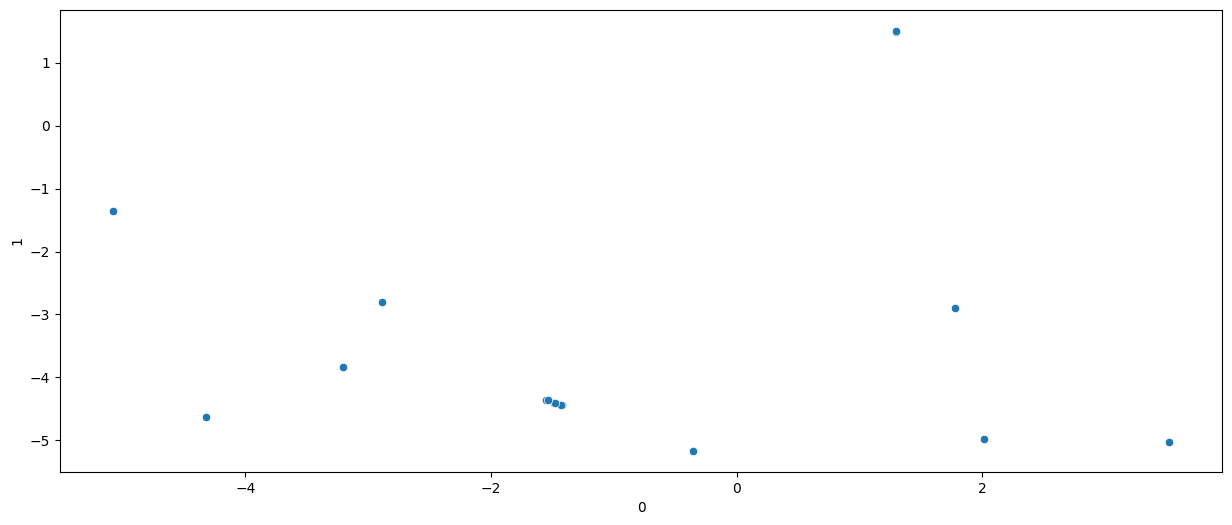

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15,6))
embedding_graph = sns.scatterplot(data=context_vector_df, x=context_vector_df[0], y=context_vector_df[1])

for i, word in enumerate(vocab_data):
    data = context_vectors.cpu().detach().numpy()
    embedding_graph.annotate(word, tuple(data[i]))

In [42]:
embedding = nn.Embedding(16, 3)
embedding.state_dict()

OrderedDict([('weight',
              tensor([[ 0.8212,  0.0199, -2.0618],
                      [-0.7725,  0.0558,  0.6837],
                      [ 1.2496,  1.5464, -0.6298],
                      [ 2.1904,  0.3164, -0.1985],
                      [-0.1003,  1.1369, -0.8063],
                      [-0.3516, -1.0496,  0.2188],
                      [-0.2127, -0.6794, -1.7814],
                      [ 2.2613,  0.2305, -0.5974],
                      [ 1.3887, -1.1365, -1.0111],
                      [ 0.5299,  0.1714,  0.1929],
                      [-0.3169,  0.8191,  1.4429],
                      [ 0.9071,  2.0797, -0.2416],
                      [-0.7480, -0.3190, -1.6438],
                      [ 0.0028, -0.6094, -0.1208],
                      [ 0.9010, -0.3563, -0.3057],
                      [-1.0496, -0.7184,  0.6261]]))])

In [51]:
# example_data = torch.arange(16)

class Embedding(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super().__init__()
        self.l_0 = nn.Embedding(vocab_size, embed_size)
        
    def forward(self, x):
        return self.l_0(x)

In [57]:
pytorch_embedding = Embedding(16, 3)
pytorch_embedding.to(device)
optimizer = torch.optim.Adam(params=pytorch_embedding.parameters(), lr=LR)
train_model(pytorch_embedding, X, y, criterion, optimizer, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'